
#### 1. Use a python module containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [141]:
from pydataset import data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import aquire
import prepare
import explore
import split_scale

In [2]:
df_iris = data("iris")

#### print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


#### print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

#### print the column names

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

#### print the data type of each column

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

#### print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- no rescaling, as they all appear to be in the same range/units

#### 2. Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [8]:
df_excel = pd.read_excel("Excel_Exercises.xlsx")

#### assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sample = df_excel.head(100)

#### print the number of rows of your original dataframe

In [10]:
df_excel.shape[0]

7049

#### print the first 5 column names

In [11]:
df_excel.iloc[0:0,0:5]

,customer_id,gender,is_senior_citizen,partner,dependents


#### print the column names that have a data type of object

In [12]:
df_excel.columns [df_excel.dtypes == object]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

#### compute the range for each of the numeric variables.

In [13]:
# df_excel.describe()
for x in df_excel.select_dtypes(include = "number"):
    print(x, df_excel[x].min(), df_excel[x].max())

is_senior_citizen 0 1
phone_service 0 2
internet_service 0 2
contract_type 0 2
monthly_charges 18.25 118.75
total_charges 18.8 8684.8


#### 3. Read the data from this google sheet into a dataframe, df_google

In [14]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

#### print the first 3 rows

In [15]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### print the number of rows and columns

In [16]:
df_google.shape

(891, 12)

#### print the column names

In [17]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### print the data type of each column

In [18]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### print the summary statistics for each of the numeric variables

In [19]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### print the unique values for each of your categorical variables

In [20]:
for x in df_google.select_dtypes(include = object):
    print(x, df_google[x].unique())

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'T

#### Use the function defined in acquire.py to load the iris data.

In [21]:
 df_iris = aquire.get_iris_data()

#### Drop the species_id and measurement_id columns.

In [22]:
df_iris.drop(columns = ["species_id","measurement_id"],inplace=True)

#### Rename the species_name column to just species.

In [23]:
df_iris.rename(columns={"species_name":"species"}, inplace=True)

#### Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

In [24]:
df_iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [25]:
encoder = LabelEncoder()
encoder.fit(df_iris.species)
df_iris.species = encoder.transform(df_iris.species)
df_iris.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [26]:
encoder.inverse_transform(df_iris.species)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

#### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [27]:
def prep_iris(df):
    df.drop(columns = ["species_id","measurement_id"],inplace=True)
    df.rename(columns={"species_name":"species"}, inplace=True)
    encoder = LabelEncoder()
    encoder.fit(df.species)
    df.species = encoder.transform(df.species)
    return df

#### Use the function you defined in acquire.py to load the titanic data set.

In [28]:
df_titanic = aquire.get_titanic_data()

#### Handle the missing values in the embark_town and embarked columns.

In [29]:
df_titanic.fillna(np.nan,inplace=True)
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_mode.fit(df_titanic[["embarked","embark_town"]])
df_titanic[["embarked","embark_town"]] = imp_mode.transform(df_titanic[["embarked","embark_town"]])

#### Remove the deck column.


In [30]:
df_titanic.drop(columns="deck", inplace=True)

#### Use a label encoder to transform the embarked column.

In [31]:
encoder = LabelEncoder()
df_titanic.embarked = encoder.fit_transform(df_titanic.embarked)

#### Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [32]:
scaler = MinMaxScaler()
df_titanic[["age","fare"]] = scaler.fit_transform(df_titanic[["age","fare"]])

#### Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [33]:
def prep_titanic(df):
    df.fillna(np.nan,inplace=True)
    imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    imp_mode.fit(df[["embarked","embark_town"]])
    df[["embarked","embark_town"]] = imp_mode.transform(df[["embarked","embark_town"]])
    df.drop(columns="deck", inplace=True)
    encoder = LabelEncoder()
    df.embarked = encoder.fit_transform(df.embarked)
    scaler = MinMaxScaler()
    df[["age","fare"]] = scaler.fit_transform(df[["age","fare"]])
    return df

#### take in df and return x-subplots of category variables vs target variables

In [34]:
df = aquire.get_titanic_data()
df = prepare.prep_titanic(df)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,0.271174,1,0,0.014151,2,Third,Southampton,0
1,1,1,1,female,0.472229,1,0,0.139136,0,First,Cherbourg,0
2,2,1,3,female,0.321438,0,0,0.015469,2,Third,Southampton,1
3,3,1,1,female,0.434531,1,0,0.103644,2,First,Southampton,0
4,4,0,3,male,0.434531,0,0,0.015713,2,Third,Southampton,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        891 non-null int64
class           891 non-null object
embark_town     891 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


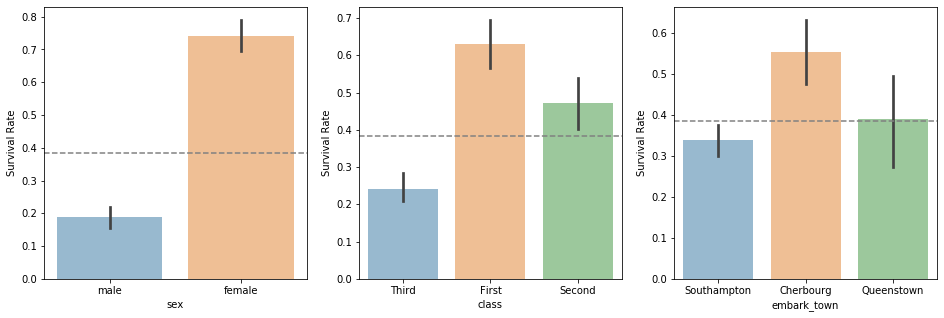

In [125]:
df_objects = df.select_dtypes(include = object).nunique()
features = pd.DataFrame(df_objects [df_objects < 5]).T.columns

_, ax = plt.subplots(nrows=1, ncols=len(features), figsize=(16,5))

survival_rate = df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

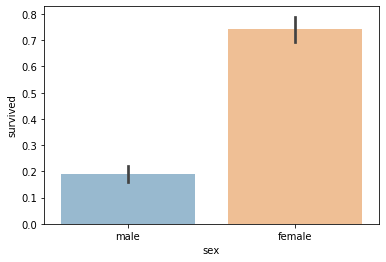

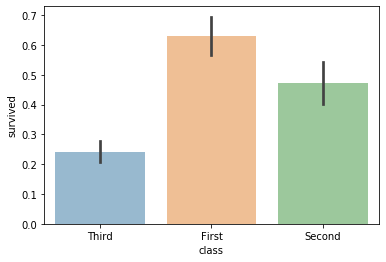

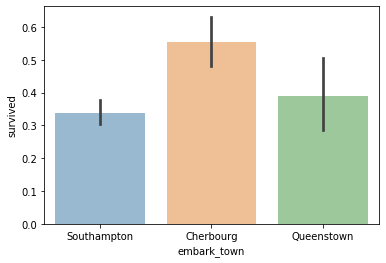

In [139]:
features = df.columns [(df.dtypes == object) & (df.nunique() < 5)]

getsurvival_rate = df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df, alpha=.5)
    plt.show()
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')


In [69]:
df.select_dtypes(include = np.number).nunique()

passenger_id    891
survived          2
pclass            3
age              88
sibsp             7
parch             7
fare            248
embarked          3
alone             2
dtype: int64

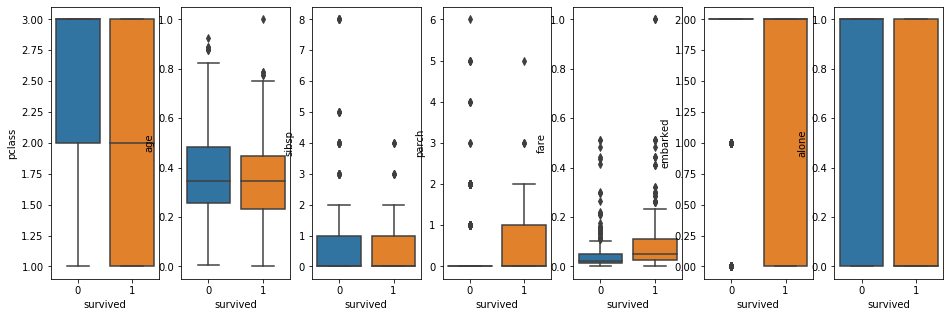

In [117]:
features = df.drop(columns=["passenger_id","survived"]).select_dtypes(include = np.number).columns

_, ax = plt.subplots(nrows=1, ncols=len(features), figsize=(16,5))

for i, feature in enumerate(features):
#     sns.boxplot('survived', feature, data=df)
#     plt.show()
    sns.boxplot('survived', feature, data=df, ax=ax[i])
    ax[i].set_ylabel(feature)
#     ax[i].axhline(survival_rate, ls='--', color='grey')

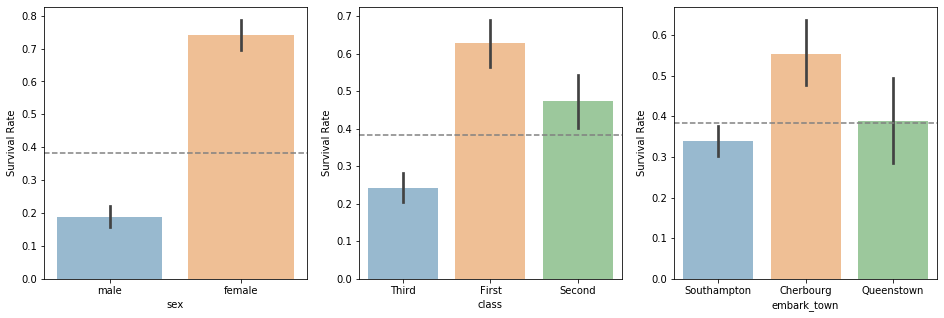

In [37]:
explore.object_subplots(df)

#### Use the iris dataset. Split data into train (70%) & test (30%) samples.

In [178]:
df_iris = aquire.get_iris_data()
df_iris = prepare.prep_iris(df_iris)
train, test = split_scale.split_my_data(df_iris, .7)

#### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

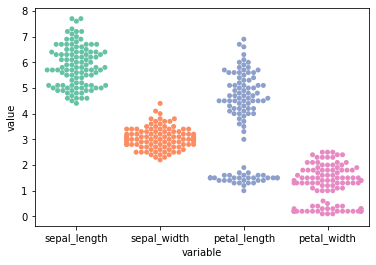

In [185]:
train_melt = train.melt(value_vars=["sepal_length","sepal_width","petal_length", "petal_width"] )

sns.swarmplot(x="variable", y="value", data=train_melt, palette="Set2")
# ax = sns.boxplot(x="pclass", y="age", data=df,
#         showcaps=True,boxprops={'facecolor':'None'},
#         showfliers=True,whiskerprops={'linewidth':0})
# plt.legend(loc=1)

Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width
petal_length x petal_width
sepal_area x petal_area
sepal_length x petal_length
Make your figure size 14 x 8. What are your takeaways?
Create a heatmap of each variable layering correlation coefficient on top.

Create a scatter matrix visualizing the interactionm of each variable

Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

must include null hypothesis, alternative hypothesis, t-test, results, summary
H
0
: the difference in sepal length between virginica and versicolor is insignificant.
H
a
: the difference in sepal length between virginica and versicolor is substantial.
We will test if the sepal length of virginica is significantly different than that of the versicolor.
If there is difference, then variable sepal_length is a good choice to keep as a feature.
We can use a t-test here, as sepal_length is somewhat normally distributed.